In [13]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Normalization
from tensorflow.keras.models import Sequential
np.set_printoptions(precision=2)

## Write a softmax function

In [14]:
def my_softmax(z):
    
    z_sum = np.sum(np.exp(z))
    z_sf = np.exp(z)/z_sum
    
    return z_sf

In [15]:
z = np.array([1., 2., 3., 4.])
a = my_softmax(z)
atf = tf.nn.softmax(z)
print(f"my softmax : {a}")
print(f"tf softmax : {atf}")

my softmax : [0.03 0.09 0.24 0.64]
tf softmax : [0.03 0.09 0.24 0.64]


## Problem Statement 1 : Multiclass classification (handwritten digits 0-9)

In [16]:
def load_data():
    X = np.load("/Users/tanishqsharma/Desktop/Dev-Practice/machine-learning/self-exploration/data/X.npy")
    y = np.load("/Users/tanishqsharma/Desktop/Dev-Practice/machine-learning/self-exploration/data/y.npy")
    return X, y

In [17]:
X, y = load_data()

In [18]:
X.shape, y.shape

((5000, 400), (5000, 1))

In [21]:
y

array([[0],
       [0],
       [0],
       ...,
       [9],
       [9],
       [9]], dtype=uint8)

### Visualizing the data

Text(0.5, 0.98, '0-9 images')

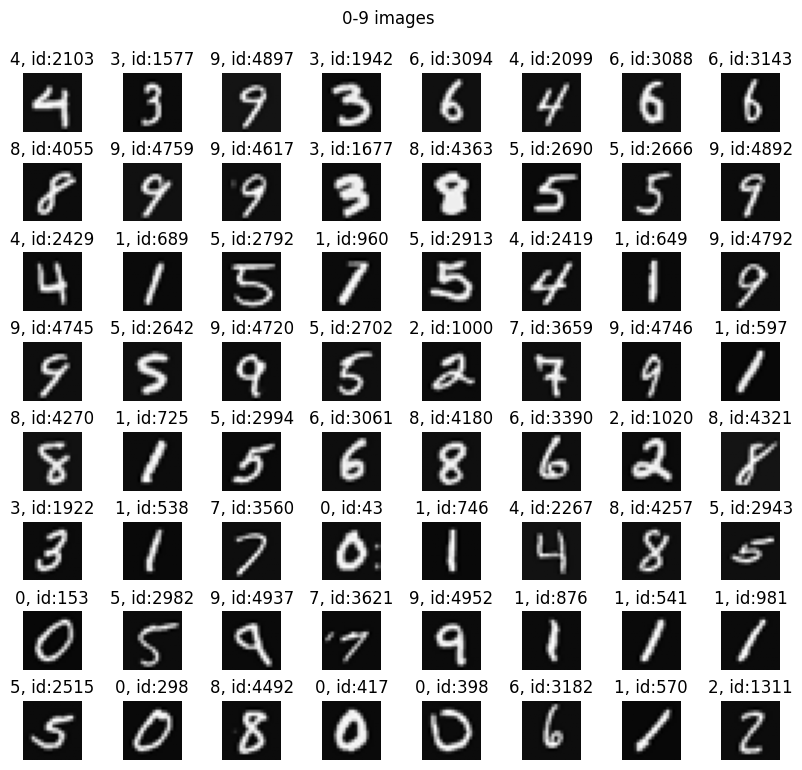

In [62]:
m = X.shape[0]
fig, axes = plt.subplots(8, 8, figsize=(8,8))
fig.tight_layout(pad=0.13, rect=[0, 0.01, 1, 0.91])
for i, ax in enumerate(axes.flat):
    
    random_index = np.random.randint(m)
    image_vector = X[random_index]
    image_vector = image_vector.reshape(20,20).T
    ax.imshow(image_vector, cmap = 'gray')
    ax.set_axis_off()
    ax.set_title(f"{y[random_index,0]}, id:{random_index}")
    
fig.suptitle('0-9 images')

### Model representation

In [41]:
model = Sequential([
    Dense(units=25, activation='relu', name='layer1'),
    Dense(units=15, activation='relu', name='layer2'),
    Dense(units=10, activation='linear', name='layer3'),
], name = 'my_model')

In [52]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = tf.keras.optimizers.Adam(0.001)
)

In [58]:
model.fit(
    X,
    y,
    epochs = 40
)

Epoch 1/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - loss: 0.0293
Epoch 2/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step - loss: 0.0317
Epoch 3/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step - loss: 0.0254
Epoch 4/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step - loss: 0.0307
Epoch 5/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step - loss: 0.0258
Epoch 6/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step - loss: 0.0216
Epoch 7/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step - loss: 0.0208
Epoch 8/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step - loss: 0.0197
Epoch 9/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step - loss: 0.0175
Epoch 10/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step - loss: 0.0172
Epoch 11/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 336us/step - loss: 0.0153
Epoch 12/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step - loss: 0.0151
Epoch 13/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step - loss: 0.0134
Epoch 14/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 336us/step - loss: 0.0120
Epoch 15/40
157/157 ━━━━━━━━━

In [54]:
model.get_weights()[0].shape

(400, 25)

In [55]:
for i in model.get_weights():
    print(i.shape)

(400, 25)
(25,)
(25, 15)
(15,)
(15, 10)
(10,)


In [56]:
layer1, layer2, layer3 = model.layers

In [57]:
W1, b1 = layer1.get_weights()
W2, b2 = layer2.get_weights()
W3, b3 = layer3.get_weights()

In [69]:
prediction = model.predict(X[2103].reshape(1,400))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [70]:
# X[2103]
X[2103].shape

(400,)

In [71]:
np.argmax(prediction)

np.int64(4)

In [73]:
prediction_probability = tf.nn.softmax(prediction)
print(f"Probability of predicting 4 : {np.max(prediction_probability)}")

Probability of predicting 4 : 1.0


In [74]:
all_predictions = model.predict(X)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 217us/step


In [79]:
all_predictions.shape

(5000, 10)

In [86]:
# all_predictions[4999]
np.argmax(all_predictions[5000])

IndexError: index 5000 is out of bounds for axis 0 with size 5000

### Plotting input along with predictions

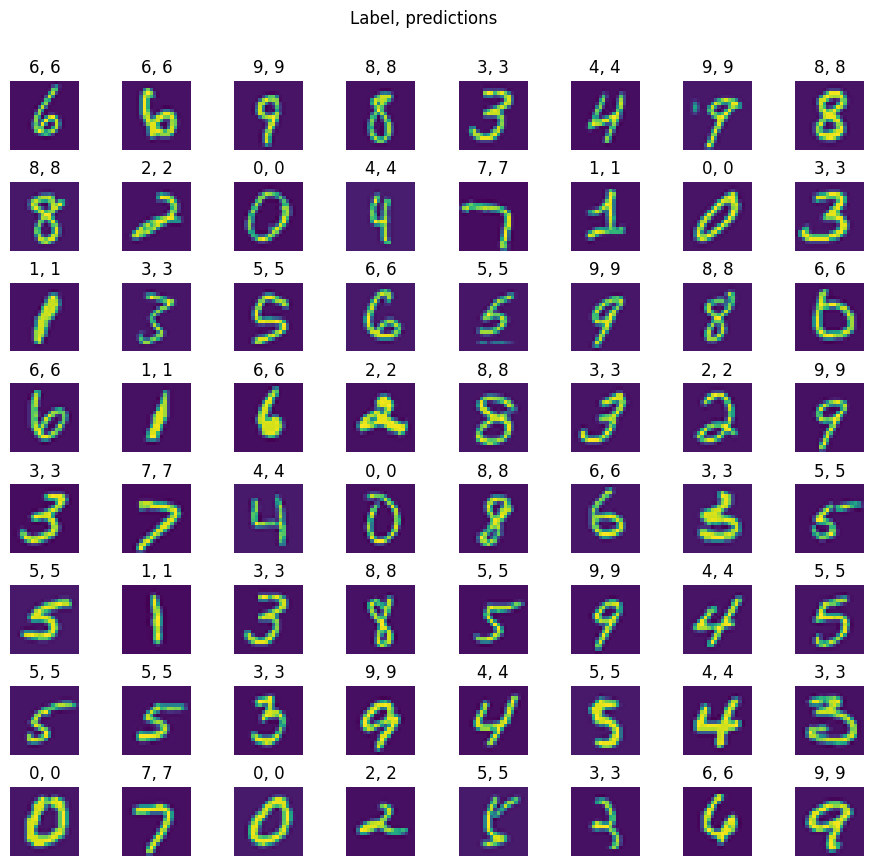

In [98]:
m = X.shape[0]

fig, axes = plt.subplots(8, 8, figsize=(9,9))
fig.tight_layout(pad=0.2, rect=[0, 0.01, 1, 0.91])

for i, ax in enumerate(axes.flat):
    
    random_index = np.random.randint(m)
    image_vector = X[random_index]
    image_vector = image_vector.reshape(20,20).T
    
    ax.imshow(image_vector)
    ax.set_title(f"{y[random_index,0]}, {np.argmax(all_predictions[random_index])}")
    ax.set_axis_off()
    
fig.suptitle(f"Label, predictions")
plt.show()

In [101]:
len((y != np.argmax(all_predictions)))

5000

In [102]:
y

array([[0],
       [0],
       [0],
       ...,
       [9],
       [9],
       [9]], dtype=uint8)

In [156]:
y_hat = np.array([np.argmax(pred) for pred in all_predictions])

In [157]:
y_hat = y_hat.reshape(-1,1)
y_hat

array([[0],
       [0],
       [0],
       ...,
       [9],
       [9],
       [9]])

In [160]:
''' error here means predictions match exactly'''
errors = np.where(y_hat != y)
random_index = errors[0][0]
random_index

IndexError: index 0 is out of bounds for axis 0 with size 0

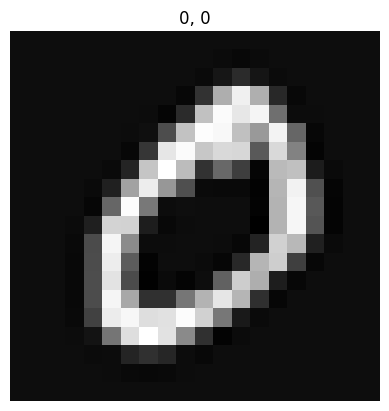

In [161]:
X_random_reshaped = X[random_index].reshape(20,20).T
plt.imshow(X_random_reshaped, cmap='gray')
plt.title(f"{y[random_index,0]}, {y_hat[random_index,0]}")
plt.axis('off')
plt.show()

In [155]:
errors

(array([0]), array([0]))

In [140]:
y.shape, y_hat.shape

((5000, 1), (5000,))

In [171]:
for i in range(len(y)):
    if y[i,0] != y_hat[i,0]:
        print(y[i,0], y_hat[i,0])
    
# print(len(y))

## Complete assignment two with personal deep-dive!